In [1]:
from pathlib import Path
import pandas as pd

In [2]:
DATA_DIR = Path("../datasets/esci-data/shopping_queries_dataset")  # 按需修改路径

In [3]:
print(">>> Loading parquet & csv files...")
examples = pd.read_parquet(DATA_DIR / "shopping_queries_dataset_examples.parquet")
products = pd.read_parquet(DATA_DIR / "shopping_queries_dataset_products.parquet")
sources = pd.read_csv(DATA_DIR / "shopping_queries_dataset_sources.csv")
print("examples shape:", examples.shape)
print("products shape:", products.shape)
print("sources shape:", sources.shape)


>>> Loading parquet & csv files...
examples shape: (2621288, 9)
products shape: (1814924, 7)
sources shape: (130652, 2)


In [4]:
df_examples_products = pd.merge(
    examples,
    products,
    how='left',
    left_on=['product_locale','product_id'],
    right_on=['product_locale', 'product_id']
)

In [5]:
df_examples_products.head()

,example_id,query,query_id,product_id,product_locale,esci_label,small_version,large_version,split,product_title,product_description,product_bullet_point,product_brand,product_color
0,0,revent 80 cfm,0,B000MOO21W,us,I,0,1,train,Panasonic FV-20VQ3 WhisperCeiling 190 CFM Ceil...,None,WhisperCeiling fans feature a totally enclosed...,Panasonic,White
1,1,revent 80 cfm,0,B07X3Y6B1V,us,E,0,1,train,Homewerks 7141-80 Bathroom Fan Integrated LED ...,None,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,80 CFM
2,2,revent 80 cfm,0,B07WDM7MQQ,us,E,0,1,train,Homewerks 7140-80 Bathroom Fan Ceiling Mount E...,None,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,White
3,3,revent 80 cfm,0,B07RH6Z8KW,us,E,0,1,train,Delta Electronics RAD80L BreezRadiance 80 CFM ...,This pre-owned or refurbished product has been...,Quiet operation at 1.5 sones\nBuilt-in thermos...,DELTA ELECTRONICS (AMERICAS) LTD.,White
4,4,revent 80 cfm,0,B07QJ7WYFQ,us,E,0,1,train,Panasonic FV-08VRE2 Ventilation Fan with Reces...,None,The design solution for Fan/light combinations...,Panasonic,White


In [6]:
df_task_2 = df_examples_products[df_examples_products["large_version"] == 1]
df_task_2_train = df_task_2[df_task_2["split"] == "train"]
df_task_2_test = df_task_2[df_task_2["split"] == "test"]

In [7]:
df_task_2.head()

,example_id,query,query_id,product_id,product_locale,esci_label,small_version,large_version,split,product_title,product_description,product_bullet_point,product_brand,product_color
0,0,revent 80 cfm,0,B000MOO21W,us,I,0,1,train,Panasonic FV-20VQ3 WhisperCeiling 190 CFM Ceil...,None,WhisperCeiling fans feature a totally enclosed...,Panasonic,White
1,1,revent 80 cfm,0,B07X3Y6B1V,us,E,0,1,train,Homewerks 7141-80 Bathroom Fan Integrated LED ...,None,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,80 CFM
2,2,revent 80 cfm,0,B07WDM7MQQ,us,E,0,1,train,Homewerks 7140-80 Bathroom Fan Ceiling Mount E...,None,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,White
3,3,revent 80 cfm,0,B07RH6Z8KW,us,E,0,1,train,Delta Electronics RAD80L BreezRadiance 80 CFM ...,This pre-owned or refurbished product has been...,Quiet operation at 1.5 sones\nBuilt-in thermos...,DELTA ELECTRONICS (AMERICAS) LTD.,White
4,4,revent 80 cfm,0,B07QJ7WYFQ,us,E,0,1,train,Panasonic FV-08VRE2 Ventilation Fan with Reces...,None,The design solution for Fan/light combinations...,Panasonic,White


In [8]:
OUT_DIR = Path("../datasets/esci-data")  # 按需修改路径
df_task_2_train.to_parquet(OUT_DIR / "esci_multiclass_train.parquet", index=False)
df_task_2_test.to_parquet(OUT_DIR / "esci_multiclass_test.parquet", index=False)

In [16]:
df_task_2.to_parquet(OUT_DIR / "esci_multiclass.parquet", index=False)

In [9]:
df_task_2_train.head()

,example_id,query,query_id,product_id,product_locale,esci_label,small_version,large_version,split,product_title,product_description,product_bullet_point,product_brand,product_color
0,0,revent 80 cfm,0,B000MOO21W,us,I,0,1,train,Panasonic FV-20VQ3 WhisperCeiling 190 CFM Ceil...,None,WhisperCeiling fans feature a totally enclosed...,Panasonic,White
1,1,revent 80 cfm,0,B07X3Y6B1V,us,E,0,1,train,Homewerks 7141-80 Bathroom Fan Integrated LED ...,None,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,80 CFM
2,2,revent 80 cfm,0,B07WDM7MQQ,us,E,0,1,train,Homewerks 7140-80 Bathroom Fan Ceiling Mount E...,None,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,White
3,3,revent 80 cfm,0,B07RH6Z8KW,us,E,0,1,train,Delta Electronics RAD80L BreezRadiance 80 CFM ...,This pre-owned or refurbished product has been...,Quiet operation at 1.5 sones\nBuilt-in thermos...,DELTA ELECTRONICS (AMERICAS) LTD.,White
4,4,revent 80 cfm,0,B07QJ7WYFQ,us,E,0,1,train,Panasonic FV-08VRE2 Ventilation Fan with Reces...,None,The design solution for Fan/light combinations...,Panasonic,White


In [11]:
counts = df_task_2["esci_label"].value_counts().sort_index()
counts

esci_label
C      75652
E    1708158
I     263165
S     574313
Name: count, dtype: int64

esci_label
C      54796
E    1314795
I     192725
S     420956
Name: count, dtype: int64


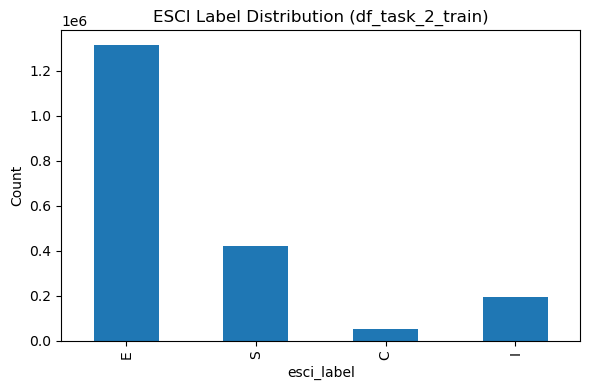

In [ ]:
import matplotlib.pyplot as plt

# 1. 统计标签分布
counts = df_task_2_train["esci_label"].value_counts().sort_index()
print(counts)

order = ["E", "S", "C", "I"]
counts = df_task_2_train["esci_label"].value_counts()
counts = counts.reindex(order).fillna(0)

plt.figure(figsize=(6, 4))
counts.plot(kind="bar")
plt.title("ESCI Label Distribution (df_task_2_train)")
plt.xlabel("esci_label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

esci_label
C      75652
E    1708158
I     263165
S     574313
Name: count, dtype: int64


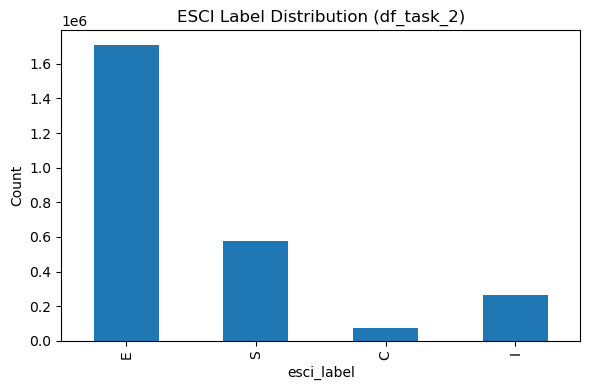

In [15]:
import matplotlib.pyplot as plt

# 1. 统计标签分布
counts = df_task_2["esci_label"].value_counts().sort_index()
print(counts)

order = ["E", "S", "C", "I"]
counts = df_task_2["esci_label"].value_counts()
counts = counts.reindex(order).fillna(0)

plt.figure(figsize=(6, 4))
counts.plot(kind="bar")
plt.title("ESCI Label Distribution (df_task_2)")
plt.xlabel("esci_label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [18]:
# read
IN_DIR = Path("../datasets/esci-data")  # 按需修改路径
df_task_2 = pd.read_parquet(IN_DIR / "esci_multiclass.parquet")

In [19]:
df_task_2.head()

,example_id,query,query_id,product_id,product_locale,esci_label,small_version,large_version,split,product_title,product_description,product_bullet_point,product_brand,product_color
0,0,revent 80 cfm,0,B000MOO21W,us,I,0,1,train,Panasonic FV-20VQ3 WhisperCeiling 190 CFM Ceil...,None,WhisperCeiling fans feature a totally enclosed...,Panasonic,White
1,1,revent 80 cfm,0,B07X3Y6B1V,us,E,0,1,train,Homewerks 7141-80 Bathroom Fan Integrated LED ...,None,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,80 CFM
2,2,revent 80 cfm,0,B07WDM7MQQ,us,E,0,1,train,Homewerks 7140-80 Bathroom Fan Ceiling Mount E...,None,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,White
3,3,revent 80 cfm,0,B07RH6Z8KW,us,E,0,1,train,Delta Electronics RAD80L BreezRadiance 80 CFM ...,This pre-owned or refurbished product has been...,Quiet operation at 1.5 sones\nBuilt-in thermos...,DELTA ELECTRONICS (AMERICAS) LTD.,White
4,4,revent 80 cfm,0,B07QJ7WYFQ,us,E,0,1,train,Panasonic FV-08VRE2 Ventilation Fan with Reces...,None,The design solution for Fan/light combinations...,Panasonic,White
